# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [3]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [4]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

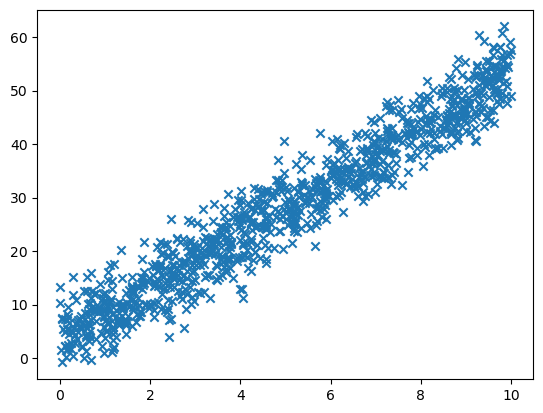

In [6]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation (as in the previous exercise)
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]` (since I seeded the random generators every time, we should all get the same results).

 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

In [9]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights.shape)

(2, 1)


In [11]:
# Calculate predictions
predictions = np.dot(X_with_bias, weights)

# Display the shape of the predictions
print(predictions.shape)


(1000, 1)


To calculate predictions using matrix multiplication without using scikit-learn, we can use the dot product of the feature matrix and the weight vector.

In [10]:
# Rest of your code here

# Add a column of ones to X
X_with_bias = np.hstack([np.ones((n_samples, 1)), X])

# Display the shape of the updated X
print(X_with_bias.shape)

(1000, 2)


To calculate the mean squared error (MSE) loss we can take the mean of difference of ground_truth & predirtions

In [12]:
# Calculate mean squared error (MSE) loss
mse_loss = np.mean((y - predictions)**2)

# Display the MSE loss
print("Mean Squared Error (MSE) Loss:", mse_loss)

Mean Squared Error (MSE) Loss: 794.2358305560875


he gradient of the MSE loss with respect to the weights

In [13]:
# Calculate the gradient of the mean squared error (MSE) loss
gradient = -2/n_samples * X_with_bias.T.dot(y - predictions)

# Display the shape of the gradient
print(gradient.shape)

# Display the gradient
print("Gradient:", gradient)


(2, 1)
Gradient: [[ -49.85729097]
 [-320.27966337]]


 The weights are updated using the gradient descent update rule: 
 weights=weights−learning_rate×gradient. 
 The loss is printed every 100 iterations to observe its convergence.

In [17]:
# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initial weights
weights = generate_weights(X_with_bias.shape[1])

# Gradient Descent loop
for iteration in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X_with_bias, weights)

    # Calculate mean squared error (MSE) loss
    mse_loss = np.mean((y - predictions)**2)

    # Calculate the gradient of the MSE loss with respect to weights
    gradient = -2/n_samples * X_with_bias.T @ (y - predictions)

    # Update weights using gradient descent
    weights -= learning_rate * gradient

    # Print the loss every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {mse_loss}")

# Display the final weights
print("Final Weights:")
print(weights)


Iteration 0, Loss: 794.2358305560875
Iteration 100, Loss: 15.64237723636616
Iteration 200, Loss: 15.187051533943936
Iteration 300, Loss: 15.019918579505655
Iteration 400, Loss: 14.958570352707412
Iteration 500, Loss: 14.936051724086635
Iteration 600, Loss: 14.927785981759182
Iteration 700, Loss: 14.924751938373394
Iteration 800, Loss: 14.923638255064361
Iteration 900, Loss: 14.9232294637733
Final Weights:
[[3.29021925]
 [4.96397542]]


To visualize the regression line along with the data points, we can plot the original data points and overlay the regression line using mathplotlib

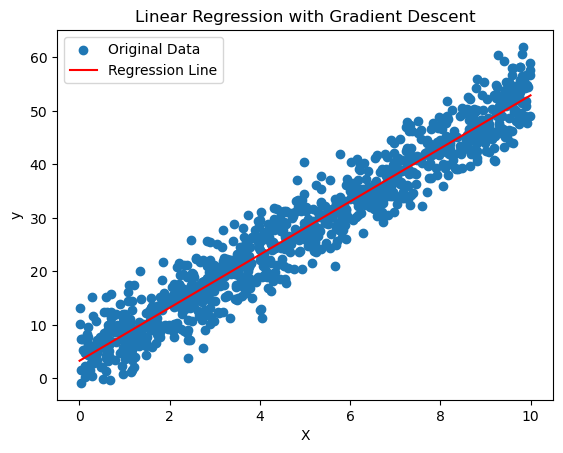

In [18]:
import matplotlib.pyplot as plt

# Plot the original data points
plt.scatter(X, y, label='Original Data')

# Plot the regression line
x_range = np.linspace(min(X), max(X), 100)
x_range_with_bias = np.hstack([np.ones((100, 1)), x_range.reshape(-1, 1)])
regression_line = x_range_with_bias @ weights

plt.plot(x_range, regression_line, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()

# Show the plot
plt.show()
